# Recreation of the Gender Prediction Kaggle Model
__original Data Scientist:__ AMAL A BIJU \
__URL of original Data Scientist:__ https://www.kaggle.com/amalab182 \
__URL of original project:__ https://www.kaggle.com/code/amalab182/gender-prediction-accuracy-99-86/notebook \

__Recreated by:__ Adrian Simms \
__8/8/2023__

### Library Input

In [1]:
import numpy as np # used in numerical anaylsis
import pandas as pd # used for dataframe use and manipulation
import matplotlib.pyplot as plt # used for plotting
import seaborn as sns # used for plotting

import pandasql as ps # used to run sql exploratory data analysis on Dataframes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # Logistic Regression for classifier model
from sklearn.tree import DecisionTreeClassifier # Decision tree Classifier model
from sklearn.neighbors import KNeighborsClassifier # K nearest Neighbor Classifier model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model
from sklearn.svm import SVC # Support Vector Classifier model

from sklearn.metrics import accuracy_score # used to score the model accuracy

from sklearn.metrics import confusion_matrix # 2 by 2 matrix to compare model results to actual results
from sklearn.metrics import ConfusionMatrixDisplay # display the confusion matrix
from sklearn.metrics import classification_report # provides statistical scoring of model




### Data Import

In [2]:
path = '/Users/adriansimms/Documents/DataSciencePortfolio/GenderPrediction/gender_classification_v7.csv'
gender_df = pd.read_csv(path) # read the csv data into a pandas data frame
gender_df.head() # by default returns the top 5 rows and the header

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
gender_df.tail() # checking bottom 5 rows

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


### Key Questions for Consideration:

Questions:
- are there any missing values in the dataset?
- does the data contain any category variables that need one-hot encoding?
- can the data be used to predict gender?
- are any of the data features better predictors?
- does the data need to be normalized or standardized?


In [4]:
gender_df.info() # look for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
gender_df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
gender_df['gender'].value_counts() # check gender splits

Female    2501
Male      2500
Name: gender, dtype: int64

In [7]:
gender_df['long_hair'].value_counts() # check long hair flag splits

1    4349
0     652
Name: long_hair, dtype: int64

In [8]:
gender_df['nose_wide'].value_counts() # check nose wide flag splits

0    2531
1    2470
Name: nose_wide, dtype: int64

In [9]:
gender_df['nose_long'].value_counts() # check nose long flag splits

1    2540
0    2461
Name: nose_long, dtype: int64

In [10]:
gender_df['lips_thin'].value_counts() # check lips thin flag splits

0    2535
1    2466
Name: lips_thin, dtype: int64

In [11]:
gender_df['distance_nose_to_lip_long'].value_counts() # check long nose to lip distance flag splits

0    2506
1    2495
Name: distance_nose_to_lip_long, dtype: int64

In [12]:
# Utilizing sql to perform some exploratory data analysis to understand data difference between Male and Female
sql_grouper="""
select 
gender 
,avg(long_hair) as pcnt_long_hair
,avg(nose_wide) as pcnt_nose_wide
,avg(nose_long) as pcnt_nose_long
,avg(lips_thin) as pcnt_lips_thin
,avg(distance_nose_to_lip_long) as pcnt_distance_nose_to_lip_long
,avg(forehead_width_cm) as avg_forehead_width_cm
,avg(forehead_height_cm) as avg_forehead_height_cm
,count(*) as gender_count
from gender_df group by gender
"""
ps.sqldf(sql_grouper)

,gender,pcnt_long_hair,pcnt_nose_wide,pcnt_nose_long,pcnt_lips_thin,pcnt_distance_nose_to_lip_long,avg_forehead_width_cm,avg_forehead_height_cm,gender_count
0,Female,0.873251,0.114754,0.135946,0.121551,0.121551,12.811675,5.796321,2501
1,Male,0.866000,0.873200,0.880000,0.864800,0.876400,13.551440,6.096360,2500


### Data Visualization

<Axes: xlabel='gender', ylabel='count'>

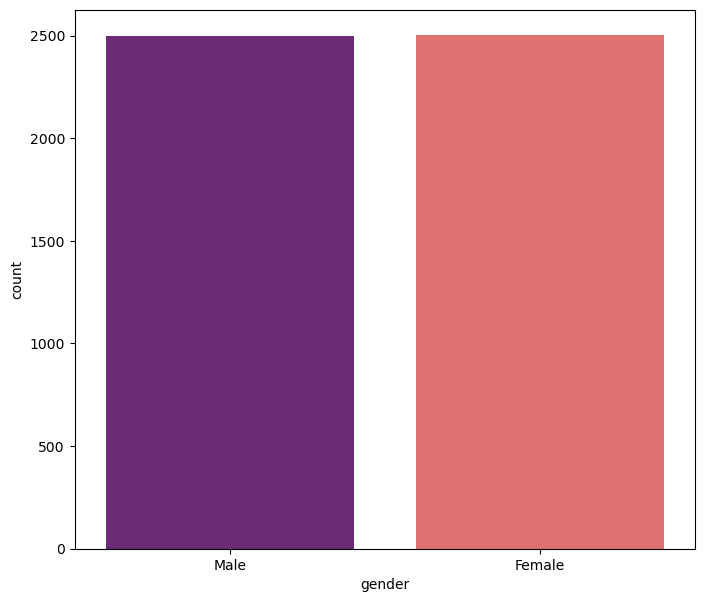

In [13]:
# countplot

plt.figure(figsize=(8,7))
sns.countplot(x='gender', data=gender_df, palette='magma')

<Axes: >

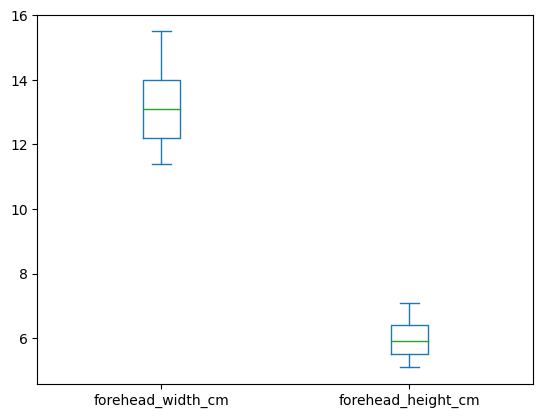

In [14]:
# boxplot using panda dataframe plotting
gender_df[['forehead_width_cm','forehead_height_cm']].plot(kind='box')

/var/folders/yh/m9glpbv12w730x9tnglzq94h0000gn/T/ipykernel_28826/774055798.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gender_df.corr(), annot=True, linewidths=0.5, cmap='Blues')


<Axes: >

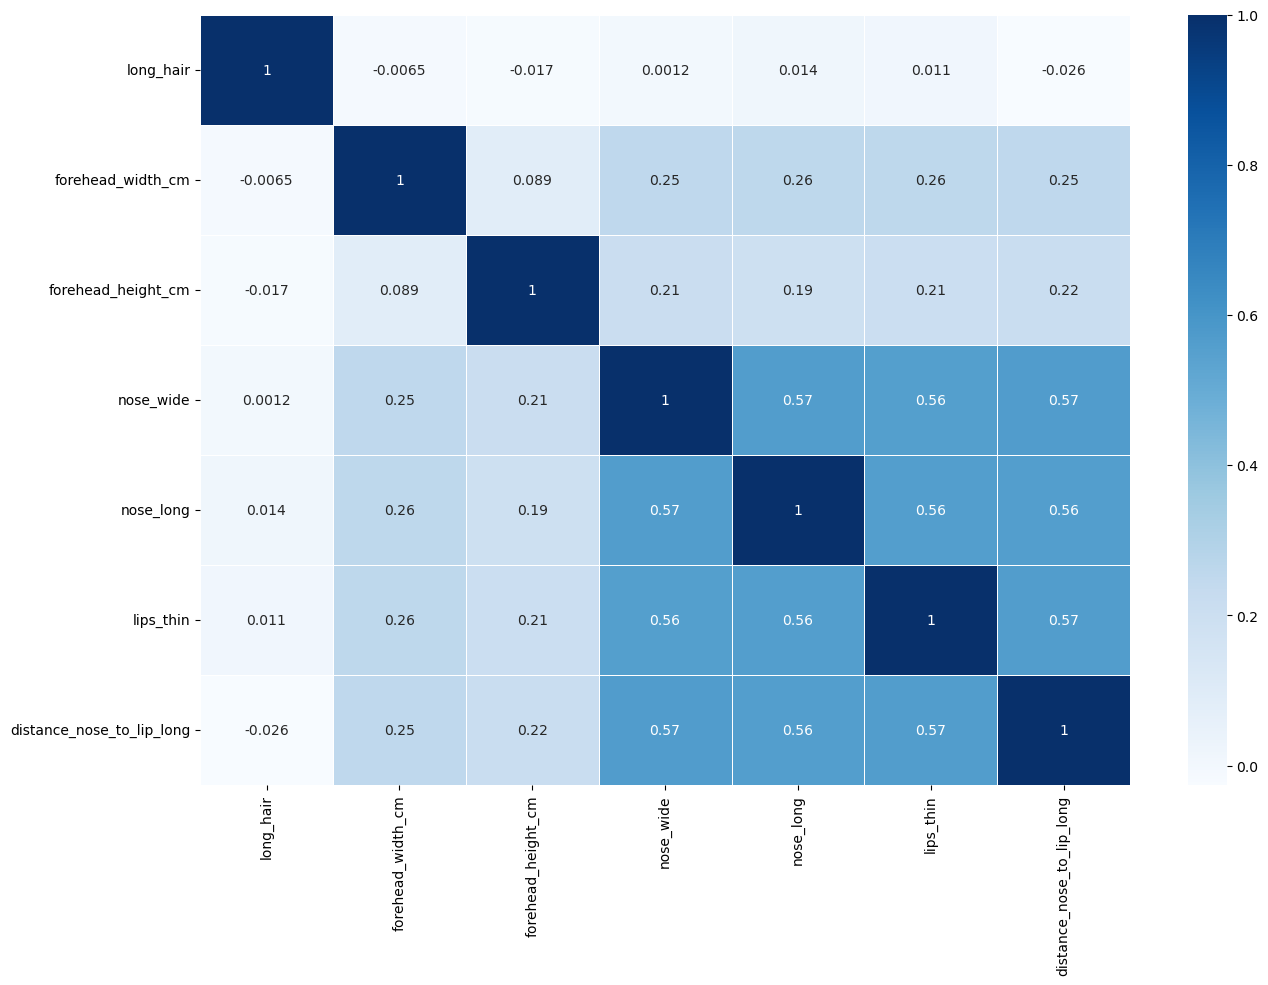

In [15]:
# Correlation Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(gender_df.corr(), annot=True, linewidths=0.5, cmap='Blues')

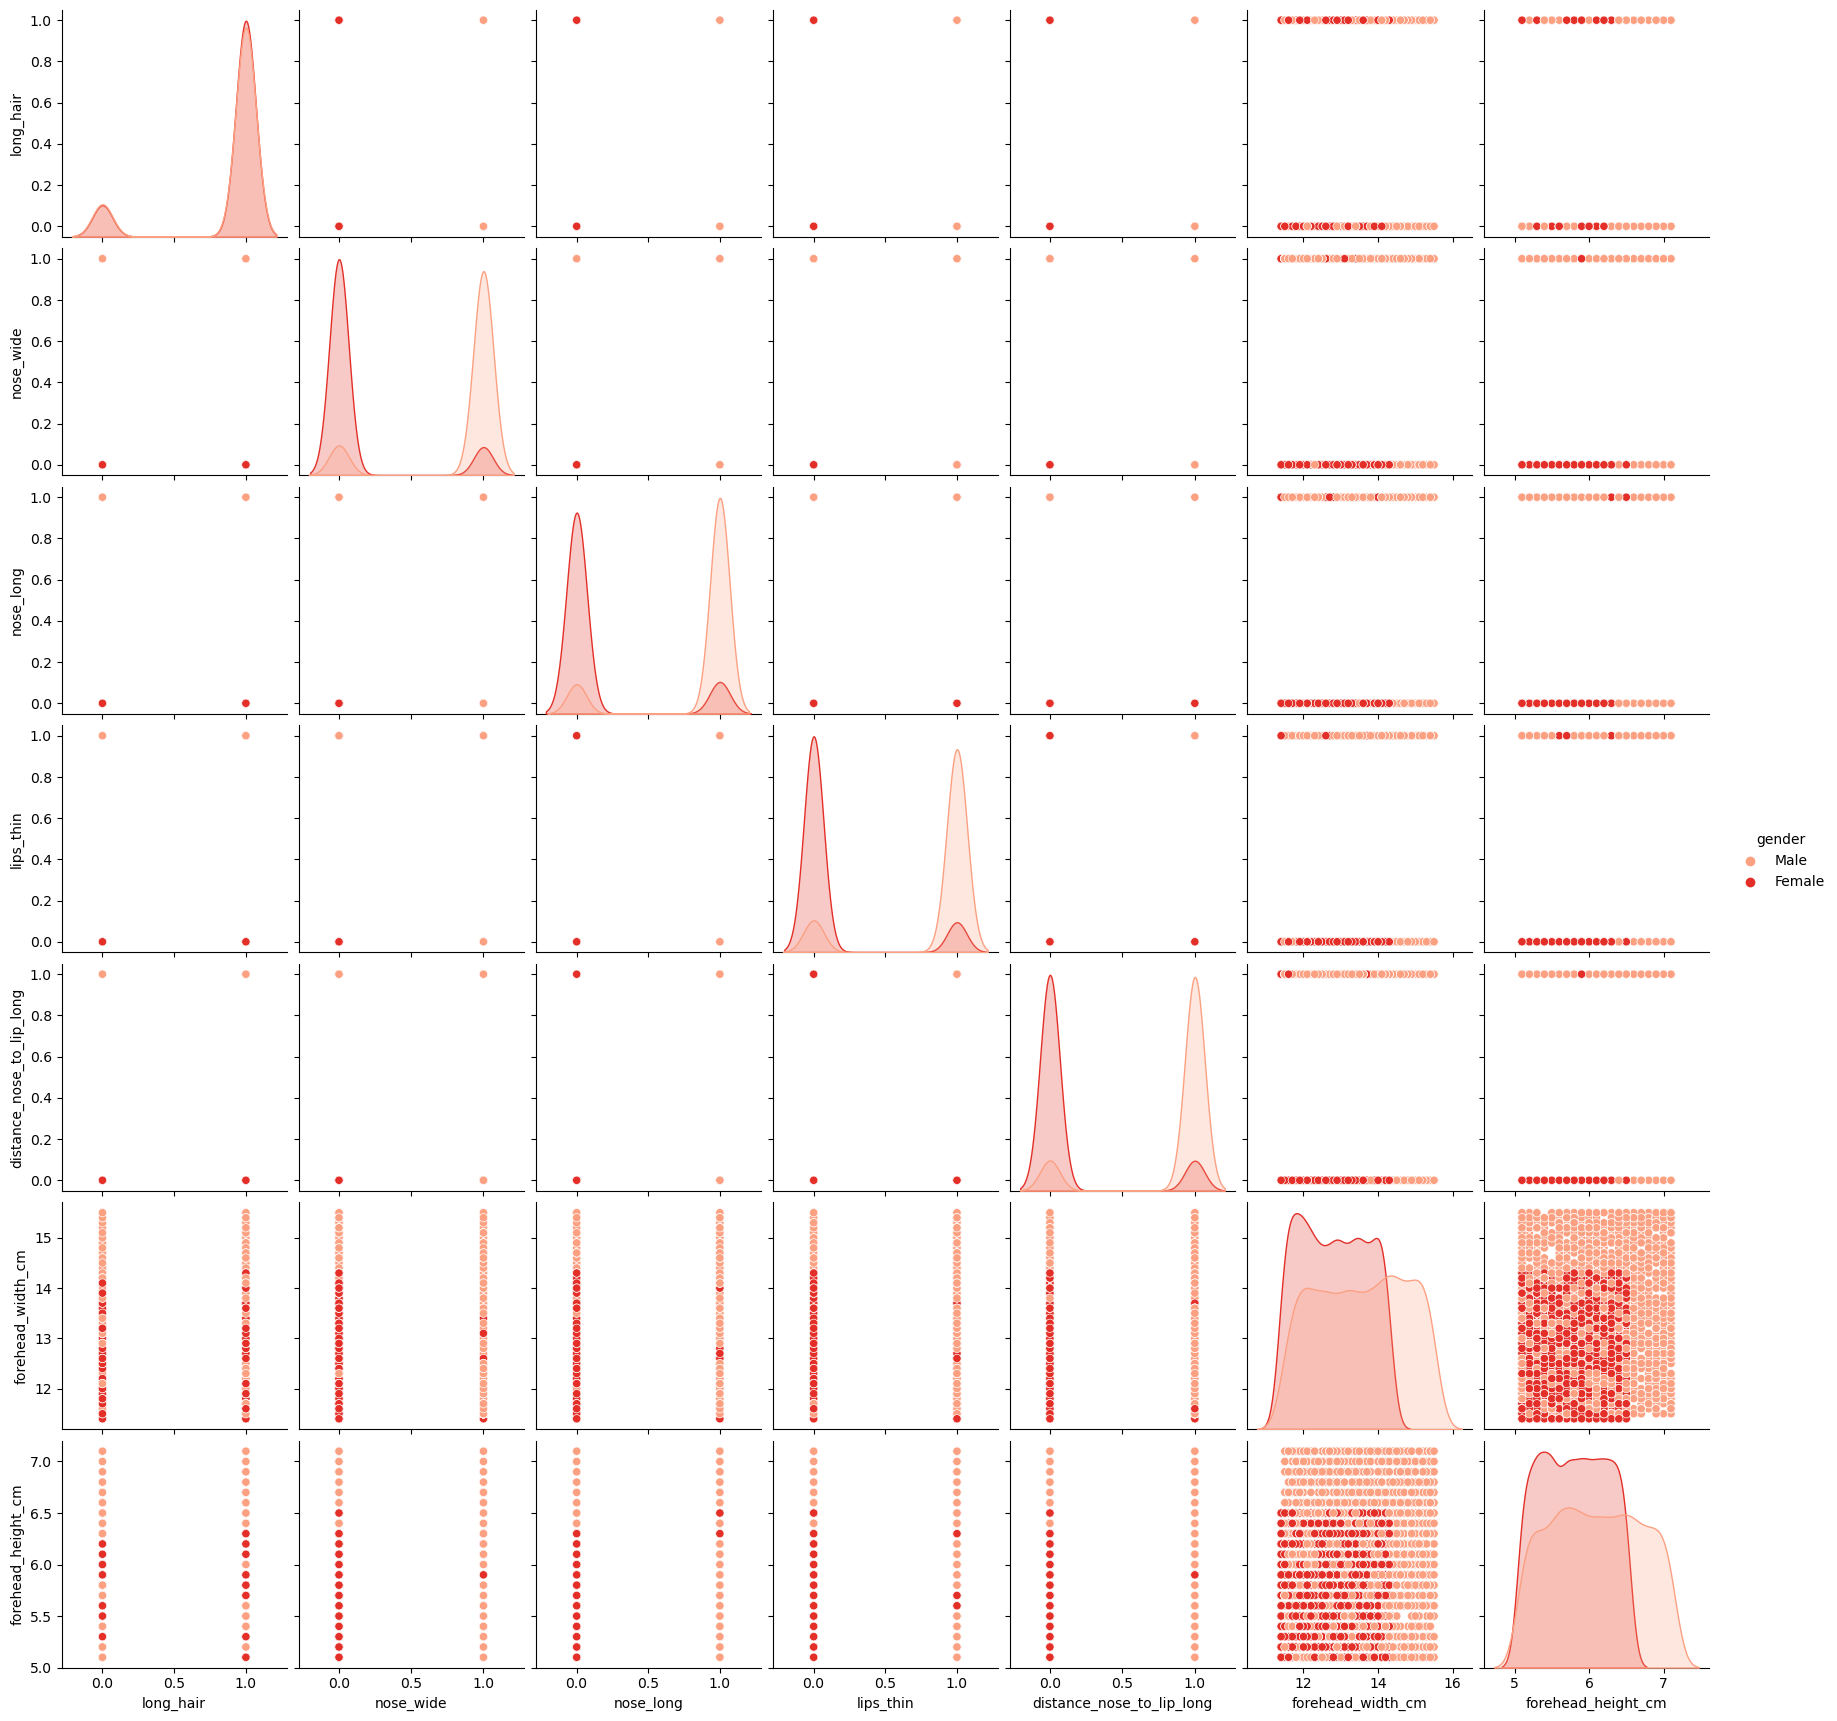

In [16]:
# Visualizing pairplots by gender
m_col=['long_hair'
       ,'nose_wide'
       ,'nose_long'
       ,'lips_thin'
       ,'distance_nose_to_lip_long'
       ,'forehead_width_cm'
       ,'forehead_height_cm'
       ,'gender']

sns.pairplot(gender_df[m_col], hue='gender', palette='Reds')

### Train Test Data Split

In [32]:
# add new binary gender flag field with 1 for male and 0 for female
gender_df['gender_flag']=np.where(gender_df['gender']=='Male', 1, 0)
gender_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_flag
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


In [33]:
X = gender_df.drop(['gender', 'gender_flag'], axis=1)
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [19]:
#Y = gender_df[['gender']]
# The classifier models expected a list(1 dimiensional array) and not a data frame (column vector)
Y = gender_df['gender'] 
Y.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.4, random_state= 1)

In [21]:
# checking to ensure traing data split as expected
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (3000, 7)
X_test (2001, 7)
Y_train (3000,)
Y_test (2001,)


### Classifier Models

In [22]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

prediction_lr = lr.predict(X_train)
prediction_lr

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

Accuracy for Logistic Regression: 0.9673333333333334


<function matplotlib.pyplot.show(close=None, block=None)>

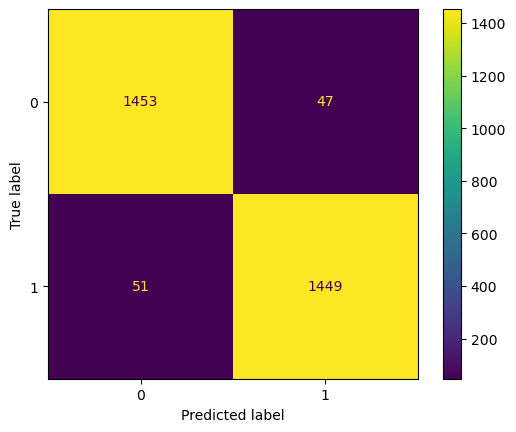

In [23]:
accuracy_lr = accuracy_score(Y_train, prediction_lr)
print('Accuracy for Logistic Regression:', accuracy_lr)
confusion_lr = confusion_matrix(Y_train, prediction_lr)
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_lr,)
cm_display_lr.plot()
plt.show

In [24]:
print(classification_report(Y_train, prediction_lr))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1500
        Male       0.97      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [25]:
# Check Logistic Regression on the test data
prediction_lr_test = lr.predict(X_test)
accuracy_lr_test = accuracy_score(Y_test, prediction_lr_test)
print("accuracy score logistic regression test:\n", accuracy_lr_test)
print("confusion matrix logistic regression test:\n",confusion_matrix(Y_test, prediction_lr_test))
print("classification report logistic regression test:\n",classification_report(Y_test, prediction_lr_test))

accuracy score logistic regression test:
 0.9690154922538731
confusion matrix logistic regression test:
 [[966  35]
 [ 27 973]]
classification report logistic regression test:
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1001
        Male       0.97      0.97      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [26]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# training Data Prediction
prediction_knn = knn.predict(X_train)
accuracy_knn = accuracy_score(Y_train, prediction_knn)
print("accuracy score k nearest neighbors classifier train:\n", accuracy_knn)
print("confusion matrix k nearest neighbors classifier train:\n",confusion_matrix(Y_train, prediction_knn))
print("classification report k nearest neighbors classifier train:\n",classification_report(Y_train, prediction_knn))

# testing Data Prediction
prediction_knn_test = knn.predict(X_test)
accuracy_knn_test = accuracy_score(Y_test, prediction_knn_test)
print("accuracy score k nearest neighbors classifier test:\n", accuracy_knn_test)
print("confusion matrix k nearest neighbors classifier test:\n",confusion_matrix(Y_test, prediction_knn_test))
print("classification report k nearest neighbors classifier test:\n",classification_report(Y_test, prediction_knn_test))

accuracy score k nearest neighbors classifier train:
 0.976
confusion matrix k nearest neighbors classifier train:
 [[1476   24]
 [  48 1452]]
classification report k nearest neighbors classifier train:
               precision    recall  f1-score   support

      Female       0.97      0.98      0.98      1500
        Male       0.98      0.97      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

accuracy score k nearest neighbors classifier test:
 0.9685157421289355
confusion matrix k nearest neighbors classifier test:
 [[976  25]
 [ 38 962]]
classification report k nearest neighbors classifier test:
               precision    recall  f1-score   support

      Female       0.96      0.98      0.97      1001
        Male       0.97      0.96      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.

In [27]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

prediction_dtc = dtc.predict(X_train)
accuracy_dtc = accuracy_score(Y_train, prediction_dtc)
print("accuracy score decision tree classifier train:\n", accuracy_dtc)
print("confusion matrix decision tree classifier train:\n",confusion_matrix(Y_train, prediction_dtc))
print("classification report decision tree classifier train:\n",classification_report(Y_train, prediction_dtc))

prediction_dtc_test = dtc.predict(X_test)
accuracy_dtc_test = accuracy_score(Y_test, prediction_dtc_test)
print("accuracy score decision tree classifier test:\n", accuracy_dtc_test)
print("confusion matrix decision tree classifier test:\n",confusion_matrix(Y_test, prediction_dtc_test))
print("classification report decision tree classifier test:\n",classification_report(Y_test, prediction_dtc_test))

accuracy score decision tree classifier train:
 0.9986666666666667
confusion matrix decision tree classifier train:
 [[1500    0]
 [   4 1496]]
classification report decision tree classifier train:
               precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1500
        Male       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

accuracy score decision tree classifier test:
 0.9675162418790605
confusion matrix decision tree classifier test:
 [[968  33]
 [ 32 968]]
classification report decision tree classifier test:
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1001
        Male       0.97      0.97      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted a

In [28]:
# Random forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# training Data Prediction
prediction_rfc = rfc.predict(X_train)
accuracy_rfc = accuracy_score(Y_train, prediction_rfc)
print("accuracy score random forest classifier train:\n", accuracy_rfc)
print("confusion matrix random forest classifier train:\n",confusion_matrix(Y_train, prediction_rfc))
print("classification report random forest classifier train:\n",classification_report(Y_train, prediction_rfc))

# testing Data Prediction
prediction_rfc_test = rfc.predict(X_test)
accuracy_rfc_test = accuracy_score(Y_test, prediction_rfc_test)
print("accuracy score random forest classifier test:\n", accuracy_rfc_test)
print("confusion matrix random forest classifier test:\n",confusion_matrix(Y_test, prediction_rfc_test))
print("classification report random forest classifier test:\n",classification_report(Y_test, prediction_rfc_test))

accuracy score random forest classifier train:
 0.9986666666666667
confusion matrix random forest classifier train:
 [[1500    0]
 [   4 1496]]
classification report random forest classifier train:
               precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1500
        Male       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

accuracy score random forest classifier test:
 0.9735132433783108
confusion matrix random forest classifier test:
 [[974  27]
 [ 26 974]]
classification report random forest classifier test:
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1001
        Male       0.97      0.97      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted a

In [29]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, Y_train)

# training Data Prediction
prediction_svc = svc.predict(X_train)
accuracy_svc = accuracy_score(Y_train, prediction_svc)
print("accuracy score support vector classifier train:\n", accuracy_svc)
print("confusion matrix support vector classifier train:\n",confusion_matrix(Y_train, prediction_svc))
print("classification report support vector classifier train:\n",classification_report(Y_train, prediction_svc))

# testing Data Prediction
prediction_svc_test = svc.predict(X_test)
accuracy_svc_test = accuracy_score(Y_test, prediction_svc_test)
print("accuracy score support vector classifier test:\n", accuracy_svc_test)
print("confusion matrix support vector classifier test:\n",confusion_matrix(Y_test, prediction_svc_test))
print("classification report support vector classifier test:\n",classification_report(Y_test, prediction_svc_test))

accuracy score support vector classifier train:
 0.9696666666666667
confusion matrix support vector classifier train:
 [[1459   41]
 [  50 1450]]
classification report support vector classifier train:
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1500
        Male       0.97      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

accuracy score support vector classifier test:
 0.9685157421289355
confusion matrix support vector classifier test:
 [[969  32]
 [ 31 969]]
classification report support vector classifier test:
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1001
        Male       0.97      0.97      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weig

In [35]:
# xg boost model

import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
Y_train_xgb = np.where(Y_train == 'Male', 1, 0)
Y_test_xgb = np.where(Y_test == 'Male', 1, 0)

xgb_model.fit(X_train, Y_train_xgb)

# training Data Prediction
prediction_xgb = xgb_model.predict(X_train)
accuracy_xgb = accuracy_score(Y_train_xgb, prediction_xgb)
print("accuracy score xgboost train:\n", accuracy_xgb)
print("confusion matrix xgboost train:\n",confusion_matrix(Y_train_xgb, prediction_xgb))
print("classification report xgboost train:\n",classification_report(Y_train_xgb, prediction_xgb))

# testing Data Prediction
prediction_xgb_test = xgb_model.predict(X_test)
accuracy_xgb_test = accuracy_score(Y_test_xgb, prediction_xgb_test)
print("accuracy score xgboost test:\n", accuracy_xgb_test)
print("confusion matrix xgboost test:\n",confusion_matrix(Y_test_xgb, prediction_xgb_test))
print("classification report xgboost test:\n",classification_report(Y_test_xgb, prediction_xgb_test))

accuracy score xgboost train:
 0.9986666666666667
confusion matrix xgboost train:
 [[1499    1]
 [   3 1497]]
classification report xgboost train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

accuracy score xgboost test:
 0.9725137431284357
confusion matrix xgboost test:
 [[974  27]
 [ 28 972]]
classification report xgboost test:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1001
           1       0.97      0.97      0.97      1000

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



### Final Result

In [36]:
scores = {'model':['logistic regression', 'k nearest neighbor', 'decision tree classifier', 'random forest classifier',
                   'support vector classifier', 'xg boost'],
         'accuracy_train':[accuracy_lr, accuracy_knn, accuracy_dtc, accuracy_rfc, accuracy_svc, accuracy_xgb],
         'accuracy_test':[accuracy_lr_test, accuracy_knn_test, accuracy_dtc_test, accuracy_rfc_test,
                          accuracy_svc_test, accuracy_xgb_test]}
scores_df=pd.DataFrame(scores)
scores_df

,model,accuracy_train,accuracy_test
0,logistic regression,0.967333,0.969015
1,k nearest neighbor,0.976000,0.968516
2,decision tree classifier,0.998667,0.967516
3,random forest classifier,0.998667,0.973513
4,support vector classifier,0.969667,0.968516
5,xg boost,0.998667,0.972514


<Axes: xlabel='accuracy_train', ylabel='model'>

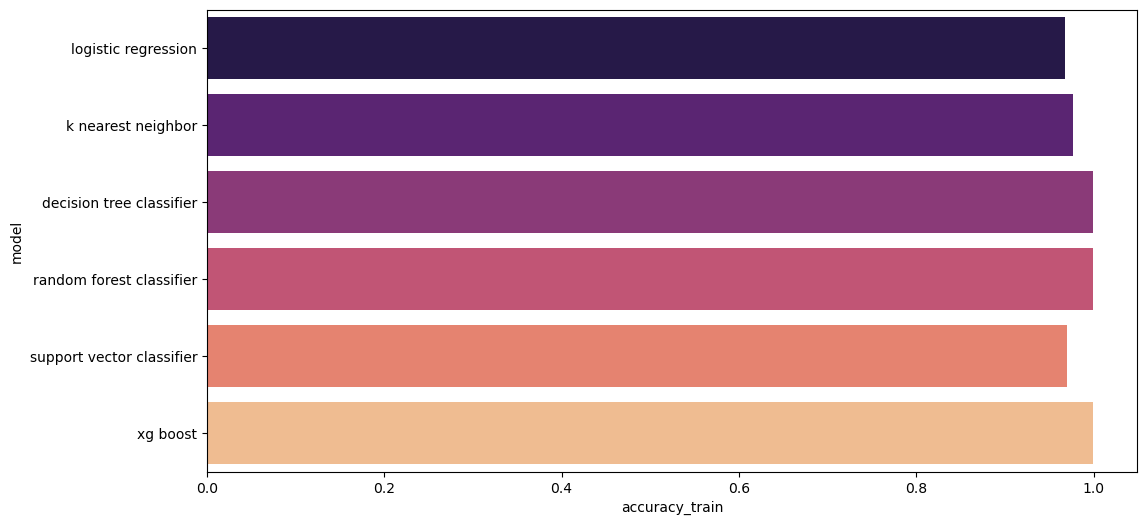

In [37]:
# plot training data scores
plt.figure(figsize = (12,6))
sns.barplot(x = scores_df['accuracy_train'], y = scores_df['model'], palette = 'magma')

<Axes: xlabel='accuracy_test', ylabel='model'>

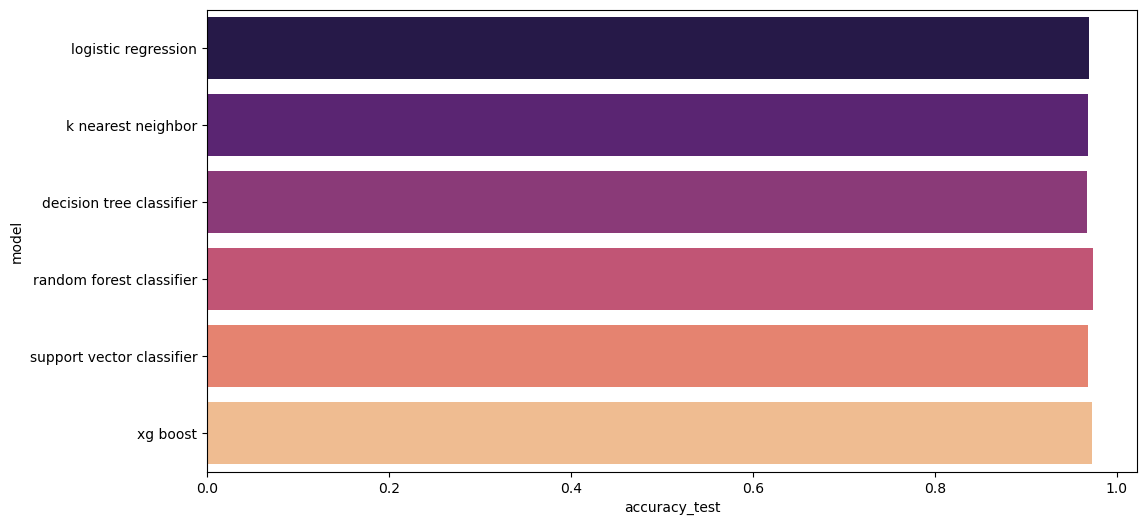

In [38]:
# plot test data scores
plt.figure(figsize = (12,6))
sns.barplot(x = scores_df['accuracy_test'], y = scores_df['model'], palette = 'magma')

### Conclusion

- Random forest was the best performing model with a training and testing accuracy score of 99.86% and 97.35%
- I was surprised that xg boost was outperformed by random forest.
- There was no parameter tuning so there is opportunity for improvement.

### Notes:

This project was used to expand my portfolio of data science projects. I initially found the gender prediction project on kaggle and after reviewing found that it was a good basic model for prediction. I did not copy the code directly but sought to recreate it whie adding additional skills to showcase from my IBM Data Science Professional Certificate course. To this end, I added the following:

- SQL Exploratory Data Analysis
- 2 additional classifer models (decision tree classifier and xg boost)

I want to give a sincere thank you to AMAL A BIJU for creating a notebook that was clearly documented and easy to both follow and replicate. 

__original Data Scientist:__ AMAL A BIJU \
__URL of original Data Scientist:__ https://www.kaggle.com/amalab182 \
__URL of original project:__ https://www.kaggle.com/code/amalab182/gender-prediction-accuracy-99-86/notebook 